# MobileNet 
- rede alterada para grayscale (Input com 1 channel)


/home/camilalm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Samples shape: (2062, 64, 64)
Labels shape: (2062, 10)

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.



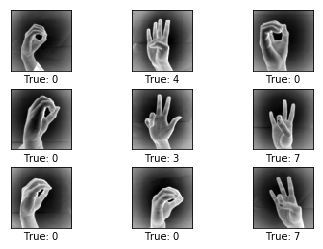

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



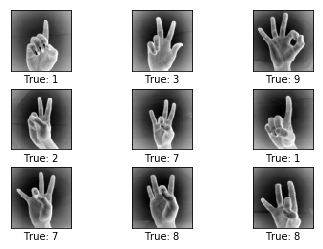

In [1]:
# Configura conjuntos de treinamento e teste 
# X_train, X_test, Y_train, Y_test
%run './functions/SLD-LoadTrainTestSets.ipynb'

In [2]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Model, Input
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, GlobalAveragePooling2D, Reshape
from keras.optimizers import Adam

In [3]:
original_input_shape = (64, 64, 3)
desired_input_shape = (64, 64, 1)
layer_name = 'conv1'

weights = None
include_top = False

adam_lr = 0.0001
nb_epochs = 100
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
validation_split = 0.1
batch_size=10

---

In [4]:
# Configuração necessária para imagens 64x64
weights = None
include_top = False

In [5]:
base_model = MobileNet(input_shape=original_input_shape,
                       weights=weights,
                       include_top=include_top)
base_model.layers[-1].name

'conv_pw_13_relu'

In [6]:
# Alterando input para grayscale (1 channel)
selected_layer = base_model.get_layer(layer_name)
selected_layer_index = base_model.layers.index(selected_layer)

w = selected_layer.get_weights()
w[0] = w[0].mean(axis=2, keepdims=True)

y = x = Input(shape=desired_input_shape)

attributes = dict(selected_layer.get_config(),
                  name=layer_name + '_1',
                  weights=w)
selected_layer = Conv2D.from_config(attributes)

y = selected_layer(y)

for layer in base_model.layers[selected_layer_index + 1:]:
    y = layer(y)

In [7]:
# Adicionando camadas representadas pelo include_top=True
# camada FC no final da rede
y = GlobalAveragePooling2D()(y)
y = Reshape((1, 1, 1024))(y)
y = Dropout(0.25)(y)
y = Conv2D(10, kernel_size=(1, 1), activation='relu')(y)
y = Activation('softmax')(y)
y = Reshape((10,))(y)

In [8]:
model = Model(inputs=x, outputs=y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 31, 31, 32)        288       
_________________________________________________________________
conv1_bn (BatchNormalization multiple                  128       
_________________________________________________________________
conv1_relu (Activation)      multiple                  0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   multiple                  0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  multiple                  288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza multiple                  128       
__________

In [9]:
expand_train_X = np.expand_dims(X_train, axis=-1)
expand_test_X = np.expand_dims(X_test, axis=-1)

Train on 1576 samples, validate on 176 samples
Epoch 1/100
1576/1576 [==============================] - 46s 29ms/step - loss: 2.3100 - acc: 0.1231 - val_loss: 2.3002 - val_acc: 0.1477
Epoch 2/100
1576/1576 [==============================] - 47s 30ms/step - loss: 2.2773 - acc: 0.1415 - val_loss: 2.2936 - val_acc: 0.1534
Epoch 3/100
1576/1576 [==============================] - 44s 28ms/step - loss: 2.2397 - acc: 0.1713 - val_loss: 2.3845 - val_acc: 0.1591
Epoch 4/100
1576/1576 [==============================] - 45s 29ms/step - loss: 2.1838 - acc: 0.2100 - val_loss: 2.1993 - val_acc: 0.2159
Epoch 5/100
1576/1576 [==============================] - 45s 29ms/step - loss: 2.0915 - acc: 0.2697 - val_loss: 2.1713 - val_acc: 0.2500
Epoch 6/100
1576/1576 [==============================] - 46s 29ms/step - loss: 2.0179 - acc: 0.2976 - val_loss: 2.1285 - val_acc: 0.2557
Epoch 7/100
1576/1576 [==============================] - 48s 31ms/step - loss: 1.9364 - acc: 0.3344 - val_loss: 2.2405 - val_acc: 0

1576/1576 [==============================] - 45s 29ms/step - loss: 0.3056 - acc: 0.8788 - val_loss: 1.7856 - val_acc: 0.5568
Epoch 61/100
1576/1576 [==============================] - 45s 29ms/step - loss: 0.2998 - acc: 0.8794 - val_loss: 1.2318 - val_acc: 0.6477
Epoch 62/100
1576/1576 [==============================] - 46s 29ms/step - loss: 0.2895 - acc: 0.8826 - val_loss: 1.1398 - val_acc: 0.6420
Epoch 63/100
1576/1576 [==============================] - 45s 28ms/step - loss: 0.3208 - acc: 0.8750 - val_loss: 1.3399 - val_acc: 0.6136
Epoch 64/100
1576/1576 [==============================] - 46s 29ms/step - loss: 0.3044 - acc: 0.8801 - val_loss: 1.1047 - val_acc: 0.6761
Epoch 65/100
1576/1576 [==============================] - 45s 28ms/step - loss: 0.2747 - acc: 0.8871 - val_loss: 1.0604 - val_acc: 0.6477
Epoch 66/100
1576/1576 [==============================] - 46s 29ms/step - loss: 0.3003 - acc: 0.8845 - val_loss: 1.1367 - val_acc: 0.6307
Epoch 67/100
1576/1576 [=======================

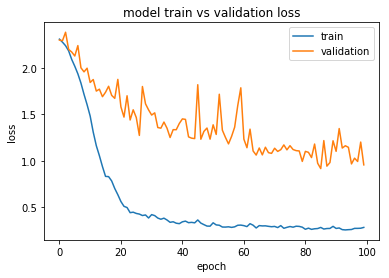

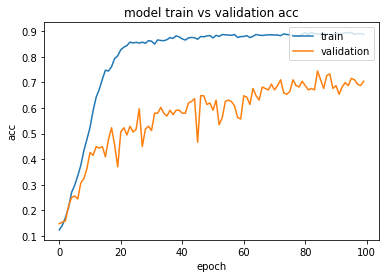

Acertos: 223 / 310
Confusion matrix, without normalization
[[30  1  0  0  0  0  0  0  1  0]
 [ 1 22  0  0  0  0  0  1  0  0]
 [ 0  8 20  0  0  0  0  5  0  1]
 [ 0  0  1 29  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  1  0  4]
 [ 0  0  0  1  4 27  0  0  1  2]
 [ 0  2  3  0 11  0  0  2  0 10]
 [ 0  3  1  0  5  0  0 26  7  0]
 [ 0  1  0  1  2  0  0  5 18  1]
 [ 0  0  0  0  0  1  0  0  0 26]]
CPU times: user 4h 48min 9s, sys: 35min 26s, total: 5h 23min 35s
Wall time: 1h 16min 13s


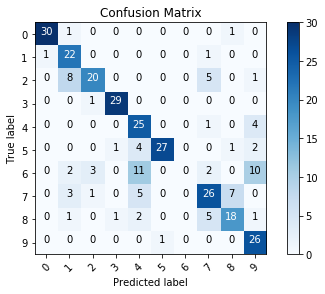

In [10]:
%%time
acertos, pred = execute_model(model, expand_train_X, Y_train, expand_test_X, Y_test,
                              validation_split, batch_size, cm_plot_labels, 
                              adam_lr, nb_epochs)

In [11]:
222/310

0.7161290322580646

---